In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylb
%matplotlib inline
plt.style.use('/Users/arceliahermosillo/Research/stochastic/paper_labels_colors.mplstyle')

# Non-crossing figures

In [2]:
colors = {"Bdazzled Blue":"#335471","Cadet Blue":"#69a2b0","French Lilac":"#73628a",\
"Fern Green":"#58804d","Olivine":"#a1c084","Amaranth":"#dd4053","Light Pink":"#ffa5a5",\
"Honey Yellow":"#ffb60a","Brown Sugar":"#a9714b","Dark Sienna":"#49111c"}

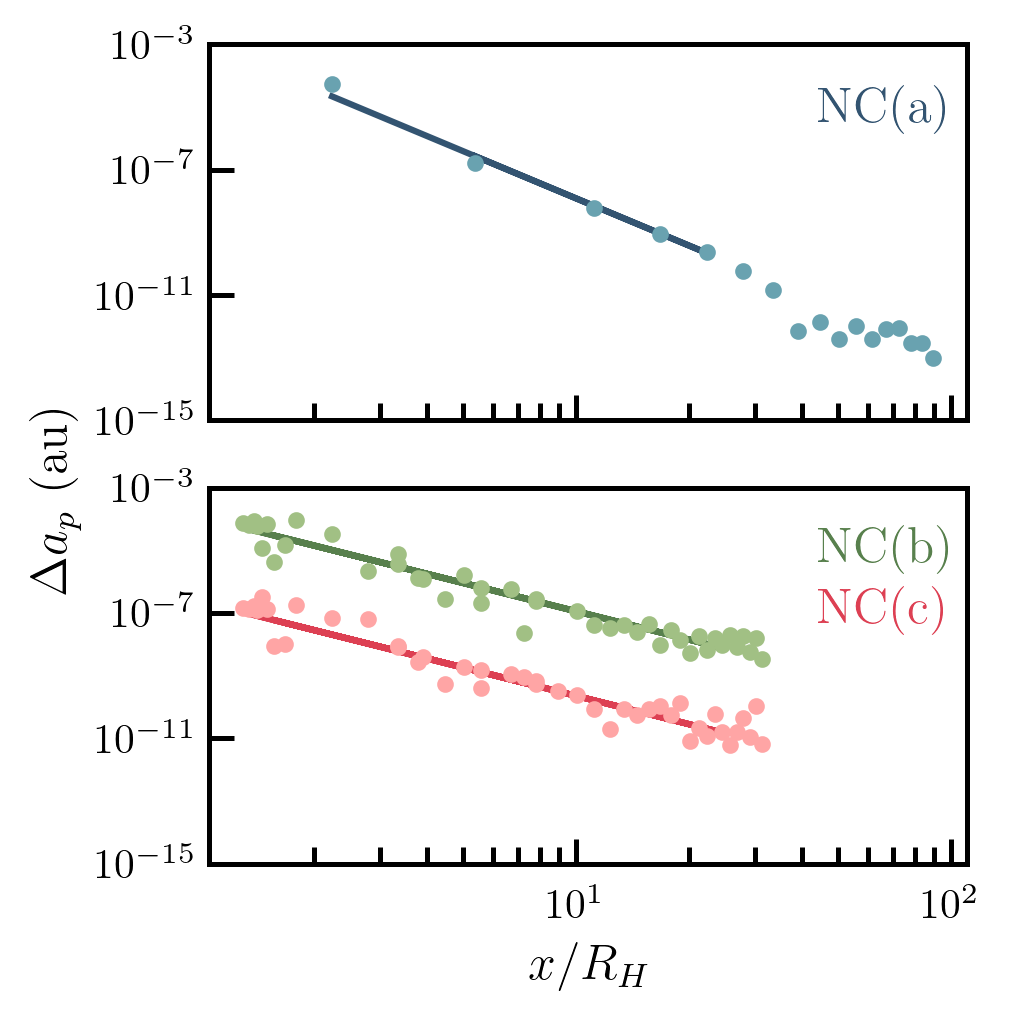

In [3]:
# constants 
mSun = 1.98e33 #grams
mEarth = 3e-6*mSun #grams
mNep = (5.15e-5)*mSun #grams
mPlut = (6.58e-9)*mSun #grams
G = 6.67e-8 # cgs
AU = 1.496e13 #cm
yr_to_sec = 3.1536e7

# equation 

def delta_ap_nc(i, m, Mp, Mstar, ap, e, x, C1):
    
    if i == 0:
        delap = -C1*m*Mp*(ap**6)/((Mstar**2)*x**5)
    if i == 1:
        delap = C1*m*(ap**4)*e/(Mstar*x**3)
    return delap

#data 

#regime 1
nc = np.genfromtxt("/Users/arceliahermosillo/Research/stochastic/LAU_MURRAYCLAY2011/ARCELIA/fig07/results.txt", names =True)
#regime 2
nc1 = np.genfromtxt("/Users/arceliahermosillo/Research/stochastic/LAU_MURRAYCLAY2011/ARCELIA/fig07/results1_cutdown.txt", names = True)
#regime 3
nc2 = np.genfromtxt("/Users/arceliahermosillo/Research/stochastic/LAU_MURRAYCLAY2011/ARCELIA/fig07/results2_cutdown.txt", names = True)

mplanet = (1e-5)*mSun
mplanetesimal = (5e-10)*mSun
a_semi = 30*AU
ecc = 0

ecc2 = 0.01
mplanetesimal3 = (1e-12)*mSun

### August 2023
### ok so decided not all \Delta a need to have the same coefficient. All can be different.
## we are only choosing values with x*rH < 25 au and fitting to that line.. 
## we got. 6.15 for regime 1 (equation a)
## 2.17 for regime 2 and 2.78 for regime 3. Average those to get 2.5 for equation b. 

# only get values less than 25 rh. 
# the reason we are doing this is because later when normalizing to C for the macro case
# we realized the micro cases were not actually all the same since before D = c2*delap^2*Ndot
# and now we are doing D = delapT^2/2T. 

x1 = nc['x'][nc['x']<25*nc['rh'][0]]
da1 = nc['deltaa'][nc['x']<25*nc['rh'][0]]

x2 = nc1['x'][nc1['x']<25*nc1['rh'][0]]
da2 = nc1['deltaa'][nc1['x']<25*nc1['rh'][0]]


x3 = nc2['x'][nc2['x']<25*nc2['rh'][0]]
da3 = nc2['deltaa'][nc2['x']<25*nc2['rh'][0]]

rh = nc2['rh'][0]

# regime 1 verifying eq 8a (i ==0)

ap_1 = delta_ap_nc(0, mplanetesimal, mplanet, mSun, a_semi, ecc, x1*AU, 6)
#regime 2 verifying eq 8b (i==1)

ap_2 = delta_ap_nc(1, mplanetesimal, mplanet, mSun, a_semi, 0.01, x2*AU, 2.5)


#regime 3 verifying eq 8b (i==1)

ap_3 = delta_ap_nc(1, mplanetesimal3, mplanet, mSun, a_semi, ecc2, x3*AU, 2.5)


fig, axs = plt.subplots(2, figsize = (3.4, 3.4), sharex=True, sharey=True)
# fig.suptitle('Sharing both axes')
# axs[0].loglog((nc['x']/nc['rh']), (-ap_1/AU), '-', c= colors['Bdazzled Blue'])
axs[0].loglog((x1/rh), (-ap_1/AU), '-', c= colors['Bdazzled Blue'])
axs[0].loglog((nc['x']/rh), nc['deltaa'], '.', c = colors["Cadet Blue"])

# axs[1].loglog((nc1['x']/nc1['rh']), ap_2/AU, '-', c = colors["Fern Green"])
axs[1].loglog((x2/rh), ap_2/AU, '-', c = colors["Fern Green"])

axs[1].loglog((nc1['x']/rh), nc1['deltaa'], '.', c = colors["Olivine"])
# axs[1].loglog((nc1['x']/nc1['rh']), ap_3/AU, '-', c = colors["Amaranth"])
axs[1].loglog((x3/rh), ap_3/AU, '-', c = colors["Amaranth"])

axs[1].loglog((nc2['x']/rh), nc2['deltaa'], '.', c = colors["Light Pink"])

axs[0].set_ylim(1e-15, 1e-3)
axs[0].annotate( "NC(a)",(0.81,0.88),xycoords = 'subfigure fraction', color = colors['Bdazzled Blue'])
axs[1].annotate( "NC(b)",(0.81,0.45), xycoords = 'subfigure fraction', color = colors["Fern Green"])
axs[1].annotate("NC(c)",(0.81,0.39), xycoords = 'subfigure fraction', color = colors["Amaranth"])
axs[1].set_xlabel("$x/R_H$")
axs[0].tick_params(labelsize = 10,axis='y', which = 'both', right = False)
axs[0].tick_params(labelsize = 10, axis='x', which = 'both', top = False)
axs[1].tick_params(labelsize = 10,axis='y', which = 'both', right = False)
axs[1].tick_params(labelsize = 10, axis='x', which = 'both', top = False)

fig.supylabel("$\Delta {a}_p$ (au)")
plt.tight_layout(pad=0.35, w_pad=0.5)
plt.show()